# Análise dos tipos de deficiência por zonas eleitorais em SJC - SP
* Análise de Dados Públicos

Base de dados utilizadas: https://www.tse.jus.br/eleicoes/estatisticas/repositorio-de-dados-eleitorais-1


* Importando as bibliotecas pandas e matplotlib para utilização em gráficos

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
low_memory=False
plt.style.use('seaborn-colorblind')
%matplotlib inline
pd.options.display.max_columns = 80
pd.options.display.max_rows = 90
plt.rcParams['figure.figsize'] = (8,5)

In [35]:
#Definido 'df' como variável do arquivo csv.
arq = 'perfil_eleitor_deficiencia_2020_SP.csv'
df = pd.read_csv(arq, encoding='latin 1', delimiter=';')

In [36]:
#Definindo o mucicípio do arquivo csv para ser analisado.
dft_sjc = df.query('NM_MUNICIPIO =="SÃO JOSÉ DOS CAMPOS"')

In [37]:
#Informação sobre o arquivo csv após estabelecer apenas o municipio de São José dos Campos.
dft_sjc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5784 entries, 50 to 444068
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   DT_GERACAO            5784 non-null   object
 1   HH_GERACAO            5784 non-null   object
 2   ANO_ELEICAO           5784 non-null   int64 
 3   SQ_ELEITOR            5784 non-null   int64 
 4   SG_UF                 5784 non-null   object
 5   CD_MUNICIPIO          5784 non-null   int64 
 6   NM_MUNICIPIO          5784 non-null   object
 7   CD_MUN_SIT_BIOMETRIA  5784 non-null   int64 
 8   DS_MUN_SIT_BIOMETRIA  5784 non-null   object
 9   NR_ZONA               5784 non-null   int64 
 10  NR_SECAO              5784 non-null   int64 
 11  CD_GENERO             5784 non-null   int64 
 12  DS_GENERO             5784 non-null   object
 13  CD_ESTADO_CIVIL       5784 non-null   int64 
 14  DS_ESTADO_CIVIL       5784 non-null   object
 15  CD_FAIXA_ETARIA       5784 non-null

In [38]:
dft_sjc.sample(10)

,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,SQ_ELEITOR,SG_UF,CD_MUNICIPIO,NM_MUNICIPIO,CD_MUN_SIT_BIOMETRIA,DS_MUN_SIT_BIOMETRIA,NR_ZONA,NR_SECAO,CD_GENERO,DS_GENERO,CD_ESTADO_CIVIL,DS_ESTADO_CIVIL,CD_FAIXA_ETARIA,DS_FAIXA_ETARIA,CD_GRAU_ESCOLARIDADE,DS_GRAU_ESCOLARIDADE,ST_ELEITOR_BIOMETRIA,CD_TIPO_DEFICIENCIA,DS_TIPO_DEFICIENCIA
396847,01/08/2020,13:21:54,2020,359090387,SP,70998,SÃO JOSÉ DOS CAMPOS,0,Sem biometria,411,242,2,MASCULINO,3,CASADO,5054,50 a 54 anos,6,ENSINO MÉDIO COMPLETO,S,3,OUTROS
152155,01/08/2020,13:21:54,2020,408753333,SP,70998,SÃO JOSÉ DOS CAMPOS,0,Sem biometria,127,527,2,MASCULINO,9,DIVORCIADO,6064,60 a 64 anos,6,ENSINO MÉDIO COMPLETO,S,2,DEFICIÊNCIA DE LOCOMOÇÃO
234493,01/08/2020,13:21:54,2020,389652330,SP,70998,SÃO JOSÉ DOS CAMPOS,0,Sem biometria,412,210,4,FEMININO,1,SOLTEIRO,6569,65 a 69 anos,3,ENSINO FUNDAMENTAL INCOMPLETO,S,2,DEFICIÊNCIA DE LOCOMOÇÃO
400074,01/08/2020,13:21:54,2020,382884379,SP,70998,SÃO JOSÉ DOS CAMPOS,0,Sem biometria,282,154,4,FEMININO,3,CASADO,6064,60 a 64 anos,3,ENSINO FUNDAMENTAL INCOMPLETO,S,2,DEFICIÊNCIA DE LOCOMOÇÃO
339865,01/08/2020,13:21:54,2020,418045261,SP,70998,SÃO JOSÉ DOS CAMPOS,0,Sem biometria,412,65,4,FEMININO,5,VIÚVO,6064,60 a 64 anos,3,ENSINO FUNDAMENTAL INCOMPLETO,S,2,DEFICIÊNCIA DE LOCOMOÇÃO
273250,01/08/2020,13:21:54,2020,320260510,SP,70998,SÃO JOSÉ DOS CAMPOS,0,Sem biometria,412,426,4,FEMININO,3,CASADO,7579,75 a 79 anos,1,ANALFABETO,S,3,OUTROS
269440,01/08/2020,13:21:54,2020,378370547,SP,70998,SÃO JOSÉ DOS CAMPOS,0,Sem biometria,127,540,2,MASCULINO,3,CASADO,8084,80 a 84 anos,8,SUPERIOR COMPLETO,S,3,OUTROS
121889,01/08/2020,13:21:54,2020,352319861,SP,70998,SÃO JOSÉ DOS CAMPOS,0,Sem biometria,127,540,4,FEMININO,9,DIVORCIADO,7074,70 a 74 anos,4,ENSINO FUNDAMENTAL COMPLETO,S,3,OUTROS
228707,01/08/2020,13:21:54,2020,388067842,SP,70998,SÃO JOSÉ DOS CAMPOS,0,Sem biometria,282,52,2,MASCULINO,1,SOLTEIRO,6569,65 a 69 anos,3,ENSINO FUNDAMENTAL INCOMPLETO,S,1,DEFICIÊNCIA VISUAL
53422,01/08/2020,13:21:54,2020,162543460,SP,70998,SÃO JOSÉ DOS CAMPOS,0,Sem biometria,282,183,2,MASCULINO,1,SOLTEIRO,2529,25 a 29 anos,5,ENSINO MÉDIO INCOMPLETO,N,4,DIFICULDADE PARA O EXERCÍCIO DO VOTO


# Zonas eleitorais de São José dos Campos

<AxesSubplot:title={'center':'Zonas eleitorais de São José dos Campos'}, ylabel='NR_ZONA'>

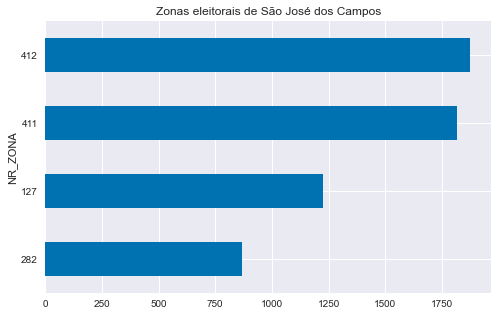

In [39]:
#Apresentação das zonas eleitorais do municipio de São José dos Campos.
dft_sjc.groupby("NR_ZONA").size().sort_values().tail(4).plot(kind='barh', title='Zonas eleitorais de São José dos Campos')

<AxesSubplot:title={'center':'Tipos de deficiência mais apresentadas nas zonas eleitorais de SJC'}, ylabel='DS_TIPO_DEFICIENCIA'>

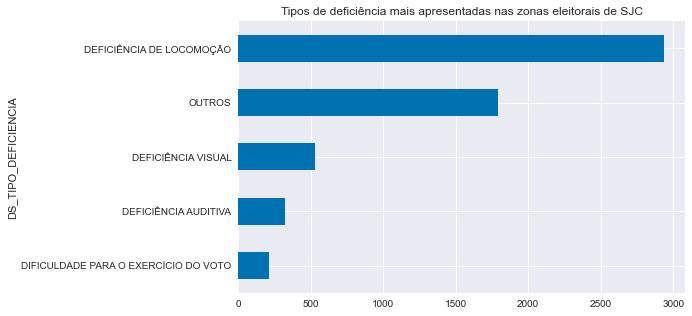

In [40]:
#Apresentação dos tipos de deficiência mais apresentados no municipio de São José dos Campos.
dft_sjc.groupby("DS_TIPO_DEFICIENCIA").size().sort_values().plot(kind='barh', title='Tipos de deficiência mais apresentadas nas zonas eleitorais de SJC')

<AxesSubplot:title={'center':'Generos mais apresentados nas zonas eleitorais de SJC'}, ylabel='DS_GENERO'>

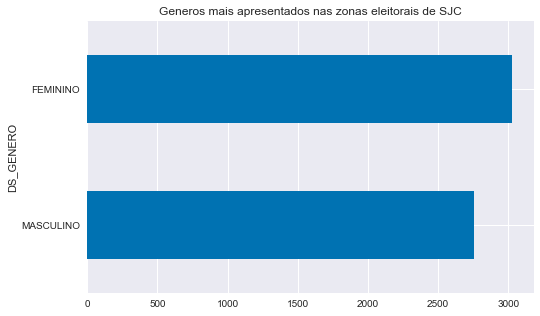

In [41]:
#Apresentação do gênero das pessoas no municipio de São José dos Campos.
dft_sjc.groupby("DS_GENERO").size().sort_values().plot(kind='barh', title='Generos mais apresentados nas zonas eleitorais de SJC')

# Apresentação por zona eleitoral

<AxesSubplot:title={'center':'Tipos de deficiência mais apresentados na zona eleitoral 412'}>

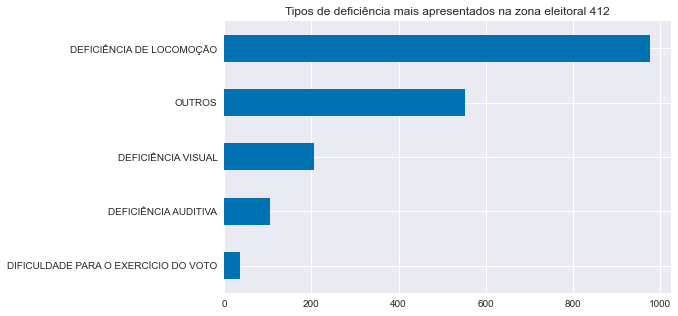

In [42]:
#Estabelecendo como deve ser filtrado por zona eleitoral o tipo de deficiência.
dft_sjc.query("NR_ZONA == '412'")['DS_TIPO_DEFICIENCIA'].value_counts().sort_values().plot(kind='barh', title="Tipos de deficiência mais apresentados na zona eleitoral 412")

<AxesSubplot:title={'center':'Tipos de deficiência mais apresentados na zona eleitoral 411'}>

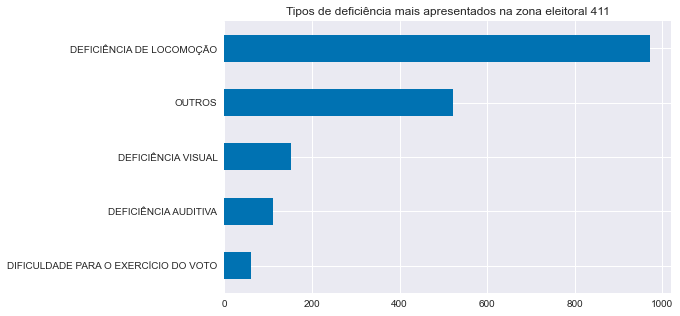

In [43]:
dft_sjc.query("NR_ZONA == '411'")['DS_TIPO_DEFICIENCIA'].value_counts().sort_values().plot(kind='barh', title="Tipos de deficiência mais apresentados na zona eleitoral 411")

<AxesSubplot:title={'center':'Tipos de deficiência mais apresentados na zona 127'}>

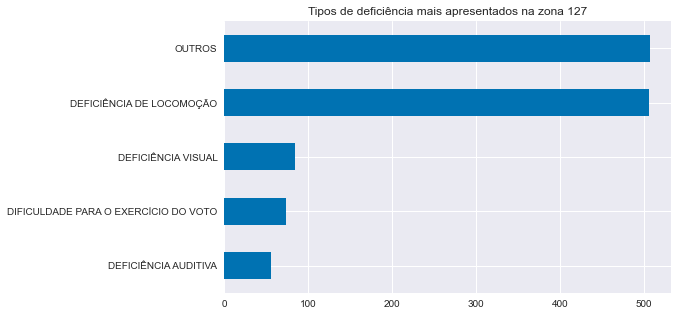

In [44]:
dft_sjc.query("NR_ZONA == '127'")['DS_TIPO_DEFICIENCIA'].value_counts().sort_values().plot(kind='barh', title="Tipos de deficiência mais apresentados na zona 127")

<AxesSubplot:title={'center':'Tipos de deficiência mais apresentados na zona eleitoral 282'}>

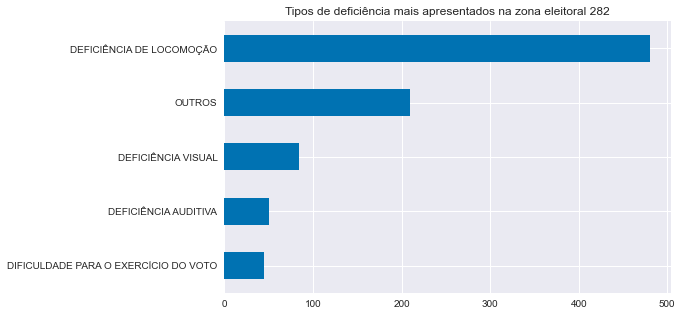

In [45]:
dft_sjc.query("NR_ZONA == '282'")['DS_TIPO_DEFICIENCIA'].value_counts().sort_values().plot(kind='barh', title="Tipos de deficiência mais apresentados na zona eleitoral 282")

# Tipos de deficiência

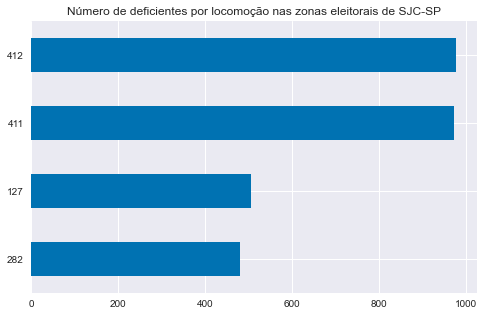

In [46]:
#Estabelecendo as zonas que mais apresentão pessoas com deficiência de locomoção.
dft_t_sjc = dft_sjc.query("DS_TIPO_DEFICIENCIA =='DEFICIÊNCIA DE LOCOMOÇÃO'")['NR_ZONA'].value_counts().sort_values().plot(kind='barh', title="Número de deficientes por locomoção nas zonas eleitorais de SJC-SP")

<AxesSubplot:title={'center':'Número de deficientes visuais nas zonas eleitorais de SJC-SP'}>

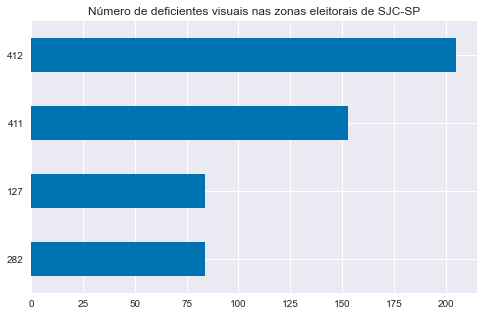

In [47]:
#Estabelecendo as zonas que mais apresentão pessoas com deficiência visual.
dft_sjc.query("DS_TIPO_DEFICIENCIA =='DEFICIÊNCIA VISUAL'")['NR_ZONA'].value_counts().sort_values().plot(kind='barh', title="Número de deficientes visuais nas zonas eleitorais de SJC-SP")

<AxesSubplot:title={'center':'Número de deficientes auditivos nas zonas eleitorais de SJC-SP'}>

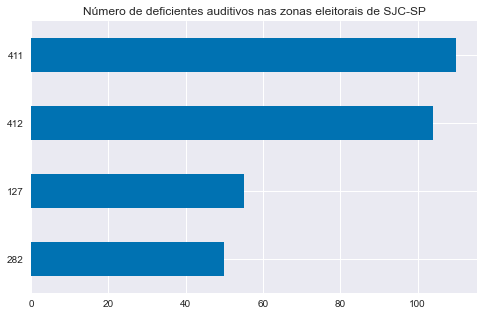

In [48]:
#Estabelecendo as zonas que mais apresentão pessoas com deficiência auditiva.
dft_sjc.query("DS_TIPO_DEFICIENCIA =='DEFICIÊNCIA AUDITIVA'")['NR_ZONA'].value_counts().sort_values().plot(kind='barh', title="Número de deficientes auditivos nas zonas eleitorais de SJC-SP")